In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data_science_job.csv')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
# percentage of missing values in each column
df.isnull().mean() * 100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
cols = [ col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
269,0.910,no_enrollment,Primary School,5.0,15.0
14509,0.754,no_enrollment,Graduate,11.0,30.0
11901,0.926,no_enrollment,Graduate,11.0,3.0
9537,0.910,no_enrollment,Graduate,8.0,33.0
2264,0.920,no_enrollment,Graduate,11.0,78.0


In [10]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

#### In filtered columns with less than 5% missing values, if we remove all rows with at least a missing value, we would still retain about 90% of data from the original dataset

In [11]:
df_new = df[cols].dropna()

In [12]:
print("Shape of original df: ", df.shape)
print("Shape of new df: ", df_new.shape)


Shape of original df:  (19158, 13)
Shape of new df:  (17182, 5)


##  Checking the MCAR (missing completely at random) condition 

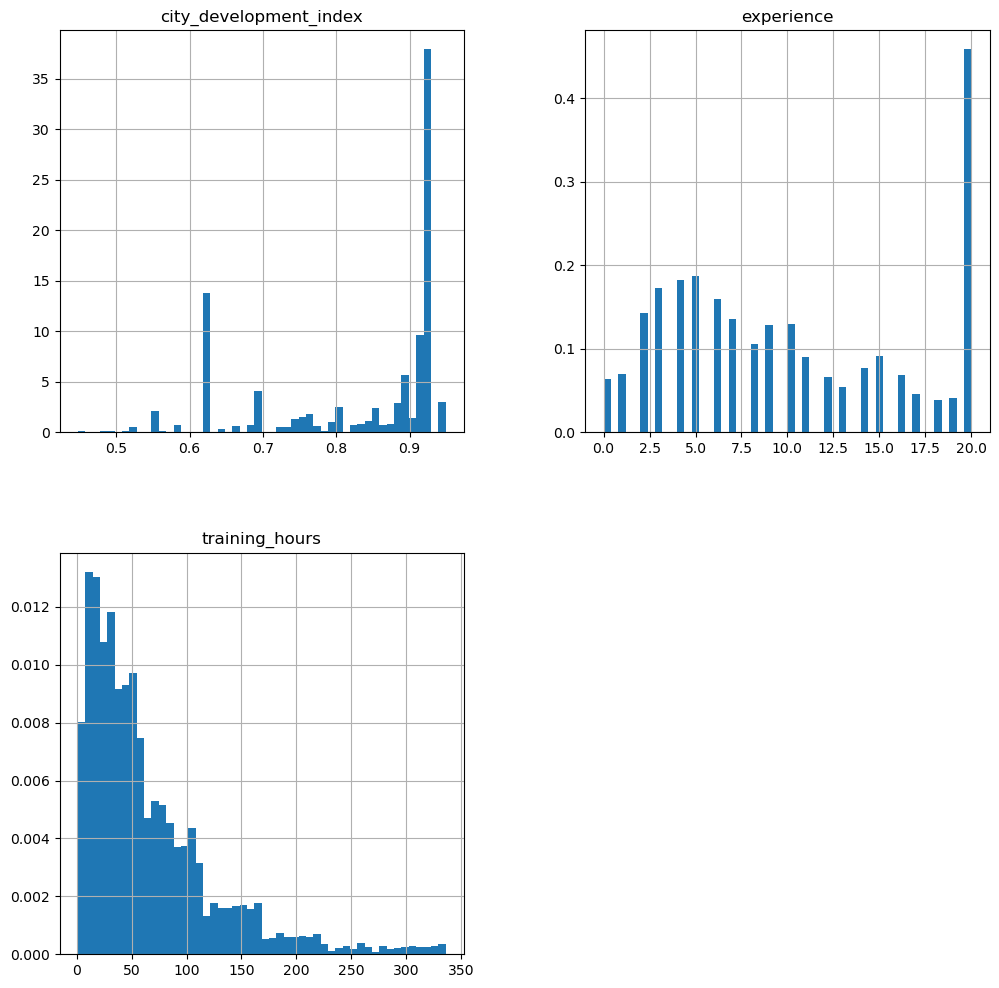

In [13]:
df_new.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

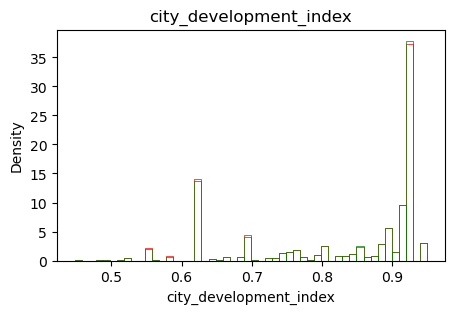

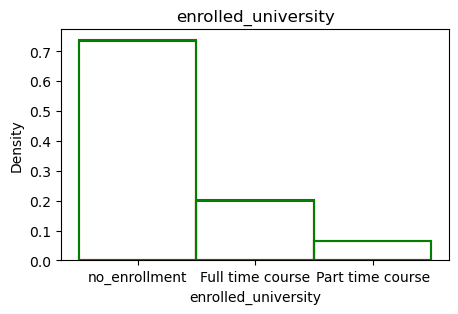

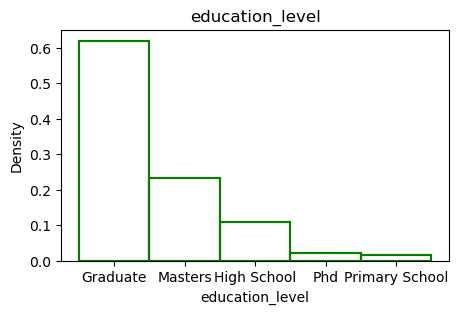

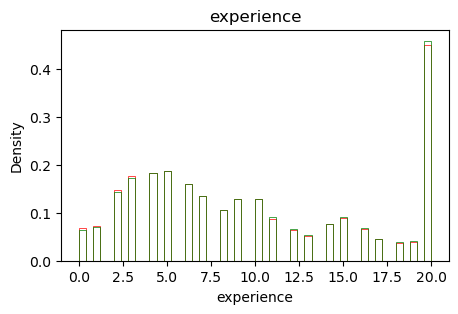

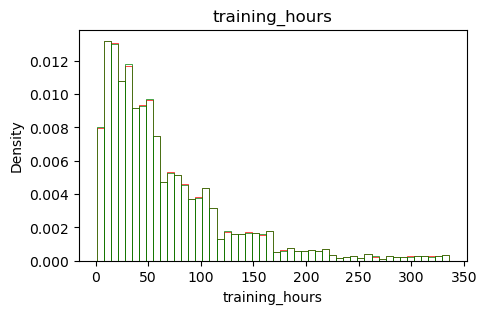

In [14]:
for col in df_new.columns:
    fig = plt.figure(figsize=(5,3))
    ax1 = fig.add_subplot(111)
    
    ax1.set_title(f'{col}')
    sns.histplot(df[col],
                 stat='density',
                 ax=ax1,
                 color='red',
                 bins=50,
                 fill=False
                 )

    sns.histplot(df_new[col], 
                 stat='density', 
                 ax=ax1, 
                 color='green', 
                 bins=50, 
                 fill=False)
    
    



### Numerical columns

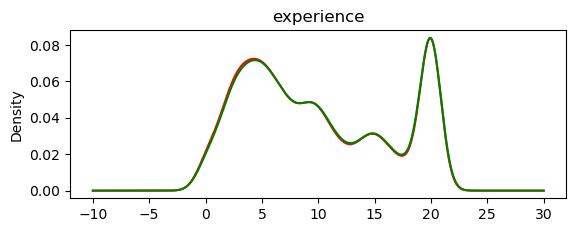

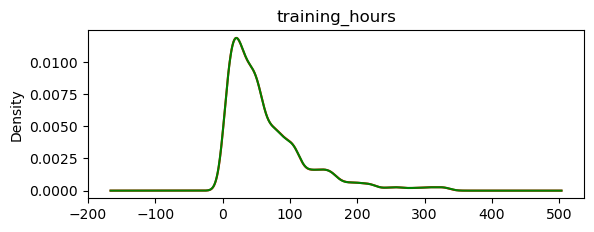

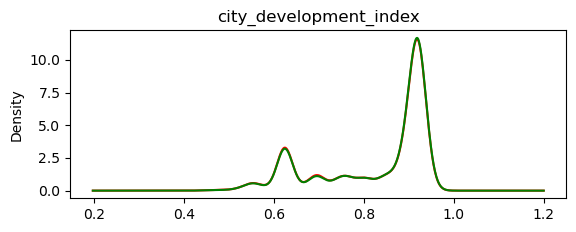

In [15]:
for col in ['experience', 'training_hours', 'city_development_index']:
    fig = plt.figure()
    ax2 = fig.add_subplot(211)
    
    ax2.set_title(f'{col}')

    # original data
    df[col].plot.density(color='red', ax=ax2)

    # data after cca
    df_new[col].plot.density(color='green', ax=ax2)
    plt.show()

### Categorical Columns

In [16]:
col1 = df['enrolled_university'].value_counts()/len(df)
col2 = df_new['enrolled_university'].value_counts()/len(df_new)

temp = pd.DataFrame({
    'Original': col1,
    'CCA' : col2
})
temp

# temp = pd.concat([col1, col2], ignore_index=True, axis=1)

# temp.rename(columns={0: "Original", 1: "CCA"})
# temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [17]:
col1 = df['education_level'].value_counts() / len(df)
col2 = df_new['education_level'].value_counts() / len(df_new)

temp = pd.DataFrame({
    'Original': col1,
    'CCA' : col2
})
temp


,Original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
